# Marinvaders - example tutorial


<a href="https://mybinder.org/v2/gl/marinvaders%2Fmarinvaders/master?filepath=%2Fdocs%2Fmarinvaders_tutorial.ipynb">
<img style="float: left" width="100" height="100"  src="https://mybinder.org/badge_logo.svg">
&nbsp;
try the notebook online
</a> 
<br>
<a href="https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/LICENSE/">
<img style="float: left" width="100" height="100"  src="https://img.shields.io/badge/License-GPLv3-blue.svg">
&nbsp; 
software license
</a> 


## Introduction

The Marine Invaders toolkit (Marinvaders) cross-references several marine 
databases to gather information on the native and alien distribution of 
marine species.

Marinvaders allows to assess the alien and native status of a specific 
species accross [eco-regions](https://en.wikipedia.org/wiki/Marine_ecoregions) and to list all alien and native species within a 
specific eco-region.

This is done by quering the [OBIS](https://obis.org/) data for distributions 
of species and linking this data to the native/alien assessment in the 
[WoRMS](http://www.marinespecies.org/index.php), 
[NatCon](https://www.conservationgateway.org/ConservationPractices/Marine/Pages/marineinvasives.aspx) and 
[GISD](http://www.iucngisd.org/gisd/) (optional) 
data bases. Marinvaders aims to facilitate the development of large-scale 
impact assessments of marine invasive species.

The Open Source code [GNU GPL 
v3](https://www.gnu.org/licenses/gpl-3.0.en.html) of marinvaders [can be found on 
Gitlab](https://gitlab.com/dlab-indecol/marinvaders), where you can also read more about the data sources and data handling. Note that the data included and processed by marinvaders keep it original license - see the [README.md License section](https://gitlab.com/marinvaders/marinvaders#license-and-data-terms-of-use) for furter information.

The following tutorial consists of two parts. In

- [Species analysis](#Species-analysis) , we investigate the native and invasive distribution of a certain species. In
- [Eco-region assessment](#Eco-region-assessment), we explore native and 

alien species within a specific eco-region

For both sections, we need the marinvaders library. See the 
[README](https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/README.md) at the 
repository for the full installation instructions.

In [1]:
import marinvaders

For convenience, we are using [itable](https://github.com/mwouts/itables) heres to show interactive pandas DataFrames.
This does only work in the classic Jupyter Notebook view (not in in 
JupyterLab). If you are running the latter, switch to the classic view in 
"Help - Launch Classic Notebook" or remove the next cell (itables adds interactive filtering and search to the pandas.DataFrames - the notebook can also used without that).

In [2]:
import itables.options as opt

opt.classes = ["display", "nowrap"]
opt.columnDefs = [{"width": "120px", "targets": "_all"}]
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# If you receive a read "Javascript Error" here, see explanation above.

<IPython.core.display.Javascript object>

With all the setup out of the way, we can start with the first analysis.

## Species analysis

<img style="float: right" alt="a striped barnacle" src="http://images.marinespecies.org/thumbs/12795_paarsgestreepte-zeepok.jpg?w=200"> 

Here we analyse the native and invasive distribution of a certain species.
As an example we use *Amphibalanus amphitrite* (Darwin, 1854), aka the
[striped barnacle](https://en.wikipedia.org/wiki/Amphibalanus_amphitrite). 

Since species names can change as part of taxonomic restructuring, 
marinvaders uses the AphiaID to specify a certain species. We can obtain 
this id from the [World Register of Marine Species, 
WORMS](https://www.marinespecies.org):

In the search field there, enter the species 
name and you get forwarded to the [WORMS register of this 
barnacle.](https://www.marinespecies.org/aphia.php?p=taxdetails&id=421137).  
The AphiaID is stated as first entry in the overview (which is the same as 
the id used in the url). You can either use the integer number or the full 
universal identifiers string ('urn:lsid:marinespecies.org:taxname:421137'). 


Thus (this command might take some time as it collects information from 
various web data-sources):


In [3]:
species_data = marinvaders.Species(aphia_id=421137)

We can now investigate all recorded observations of this this species:

In [4]:
species_data.all_occurrences

aphiaID                  species               ECOREGION  ECO_CODE  \
0     421137  Amphibalanus amphitrite           Faroe Plateau     20021   
63    421137  Amphibalanus amphitrite               Guayaquil     20171   
62    421137  Amphibalanus amphitrite            Panama Bight     20170   
61    421137  Amphibalanus amphitrite           Cocos Islands     20169   
60    421137  Amphibalanus amphitrite                  Nicoya     20168   
..       ...                      ...                     ...       ...   
71    422776  Amphibalanus amphitrite            Gulf of Oman     20091   
72    421137  Amphibalanus amphitrite            Agulhas Bank     20192   
91    421137  Amphibalanus amphitrite  Arabian (Persian) Gulf     20090   
100   421137  Amphibalanus amphitrite   Western Mediterranean     25035   
108   421137  Amphibalanus amphitrite              Ionian Sea     25034   

    establishmentMeans dataset  \
0                Alien   WoRMS   
63               Alien   WoRMS   
62               Alien   WoRMS   
61               Alien   WoRMS   
60               Alien   WoRMS   
..                 ...     ...   
71                 NaN     NaN   
72                 NaN     NaN   
91                 NaN     NaN   
100                NaN     NaN   
108                NaN     NaN   

                                              geometry  
0    POLYGON ((-3.09456951535509 63.4485547124433, ...  
63   POLYGON ((-81.24411897872511 -5.97910789205229...  
62   POLYGON ((-75.79597950257306 -0.12223050340577...  
61   POLYGON ((-87.12664478972965 2.159260883722027...  
60   POLYGON ((-82.1099965176785 5.667232942400062,...  
..                                                 ...  
71   POLYGON ((65.49379658028141 24.3681827259033, ...  
72   POLYGON ((28.3599325705664 -36.64434819540219,...  
91   POLYGON ((54.08128034668874 21.31962372761353,...  
100  POLYGON ((12.48402140406495 37.99236565866823,...  
108  POLYGON ((18.2899674018912 40.28222218497967, ...  

[106 rows x 7 columns]

By linking this data from the OBIS database to the information about alien species locations in WoRMS, NatCon and GISD (optiona) we can get all regions where this species is  reported as alien/invasive:


In [5]:
species_data.reported_as_alien

aphiaID                  species             ECOREGION  ECO_CODE  \
0    421137  Amphibalanus amphitrite         Faroe Plateau     20021   
63   421137  Amphibalanus amphitrite             Guayaquil     20171   
62   421137  Amphibalanus amphitrite          Panama Bight     20170   
61   421137  Amphibalanus amphitrite         Cocos Islands     20169   
60   421137  Amphibalanus amphitrite                Nicoya     20168   
..      ...                      ...                   ...       ...   
25   421137  Amphibalanus amphitrite              Bahamian     20063   
24   421137  Amphibalanus amphitrite               Bermuda     20062   
23   421137  Amphibalanus amphitrite  Magdalena Transition     20061   
43   421137  Amphibalanus amphitrite     Ogasawara Islands     20122   
88   421137  Amphibalanus amphitrite       Auckland Island     20232   

   establishmentMeans dataset  \
0               Alien   WoRMS   
63              Alien   WoRMS   
62              Alien   WoRMS   
61              Alien   WoRMS   
60              Alien   WoRMS   
..                ...     ...   
25              Alien   WoRMS   
24              Alien   WoRMS   
23              Alien   WoRMS   
43              Alien   WoRMS   
88              Alien   WoRMS   

                                             geometry  
0   POLYGON ((-3.09456951535509 63.4485547124433, ...  
63  POLYGON ((-81.24411897872511 -5.97910789205229...  
62  POLYGON ((-75.79597950257306 -0.12223050340577...  
61  POLYGON ((-87.12664478972965 2.159260883722027...  
60  POLYGON ((-82.1099965176785 5.667232942400062,...  
..                                                ...  
25  POLYGON ((-66.59918034729873 21.78524919126568...  
24  POLYGON ((-64.4860650918809 28.91172628127691,...  
23  POLYGON ((-112.3200200817651 26.64850344576047...  
43  (POLYGON ((155.259128831058 21.19714715226621,...  
88  POLYGON ((168.7367649117031 -49.6441184613123,...  

[89 rows x 7 columns]

In this table the data-source for the assessment as alien is reported in column "dataset".

Finally, we can also visualize these different perspectives with:

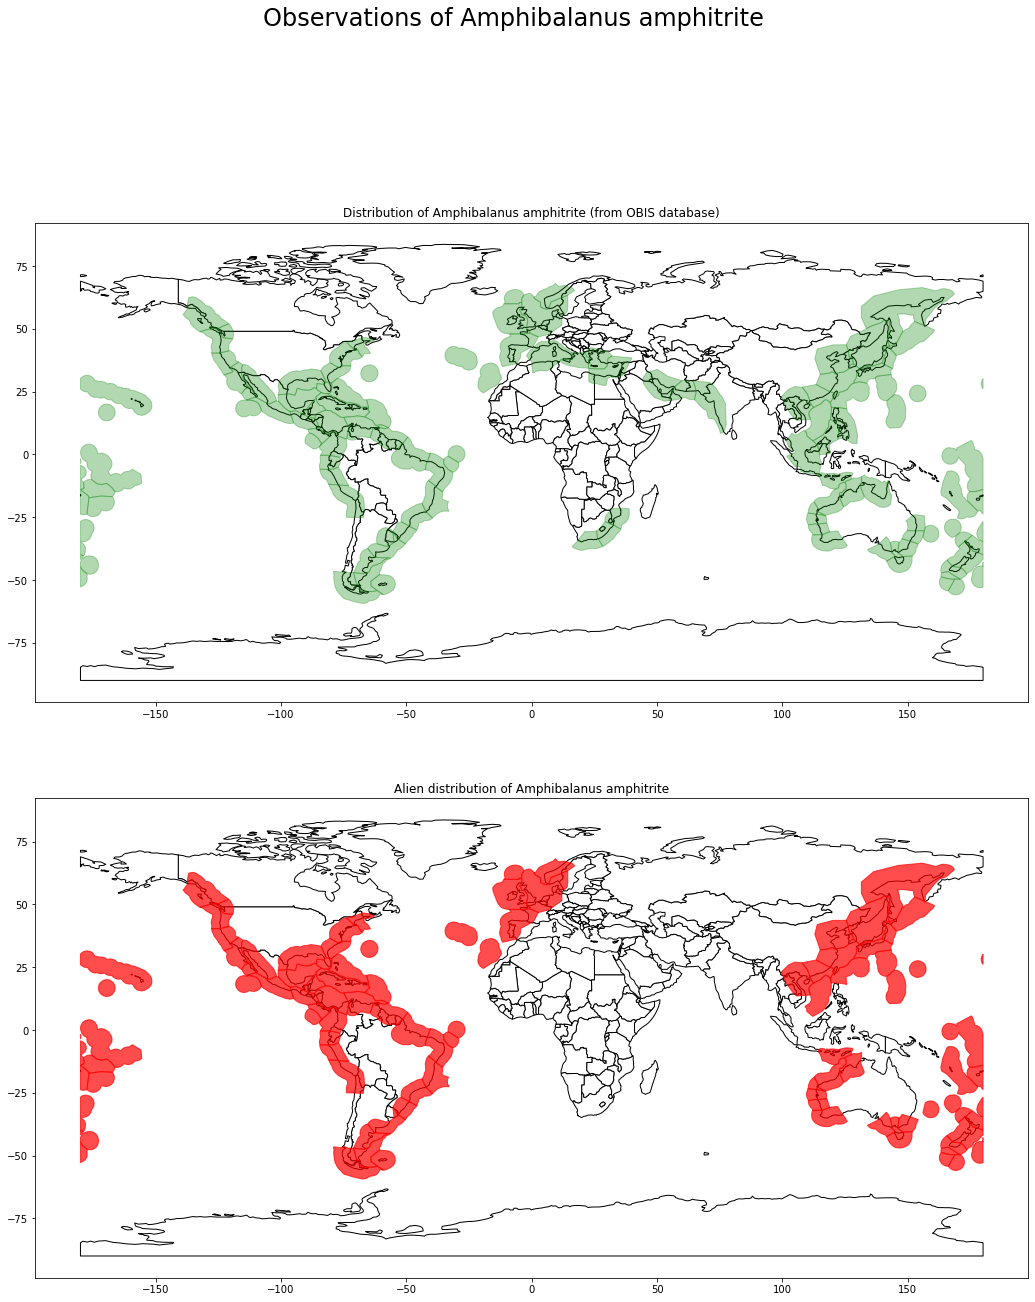

In [6]:
fig=species_data.plot()

## Eco-region assessment

Marinvaders connects data form various databases to gather a list of native 
and alien species present in a given eoc-region. 

Here, we will investigate the species present around the Sulawesi Island. 

To do so, we first need to get the eco-region code of this eco-region. 
The following command lists all eco-regions available in marinvaders

In [7]:
import marinvaders

In [8]:
marinvaders.marine_ecoregions()

ECO_CODE  ECO_CODE_X                    ECOREGION  \
0       20192         192                 Agulhas Bank   
1       20053          53             Aleutian Islands   
2       20072          72                     Amazonia   
3       20194         194            Amsterdam-St Paul   
4       20228         228  Amundsen/Bellingshausen Sea   
..        ...         ...                          ...   
227     25034          34                   Ionian Sea   
228     25031          31                   Aegean Sea   
229     25036          36                  Alboran Sea   
230     25035          35        Western Mediterranean   
231     25010          10      High Arctic Archipelago   

                             PROVINCE                        REALM  \
0                             Agulhas    Temperate Southern Africa   
1    Cold Temperate Northeast Pacific   Temperate Northern Pacific   
2                  North Brazil Shelf            Tropical Atlantic   
3                   Amsterdam-St Paul    Temperate Southern Africa   
4          Continental High Antarctic               Southern Ocean   
..                                ...                          ...   
227                 Mediterranean Sea  Temperate Northern Atlantic   
228                 Mediterranean Sea  Temperate Northern Atlantic   
229                 Mediterranean Sea  Temperate Northern Atlantic   
230                 Mediterranean Sea  Temperate Northern Atlantic   
231                            Arctic                       Arctic   

                                              geometry  
0    POLYGON ((28.35993 -36.64435, 28.28350 -36.676...  
1    MULTIPOLYGON (((-173.39419 55.59807, -168.5559...  
2    POLYGON ((-41.13012 0.47319, -41.03905 0.44390...  
3    POLYGON ((77.52994 -34.52290, 77.92307 -34.545...  
4    POLYGON ((-72.94222 -74.30962, -79.88636 -75.1...  
..                                                 ...  
227  POLYGON ((18.28997 40.28222, 18.46579 40.19296...  
228  POLYGON ((26.80983 41.87778, 29.19196 41.03381...  
229  POLYGON ((0.32179 32.44572, 0.23032 32.38912, ...  
230  POLYGON ((12.48402 37.99237, 11.95092 37.85696...  
231  POLYGON ((-101.62650 75.65949, -101.62650 75.6...  

[232 rows x 6 columns]

When using interacitve [itable](https://github.com/mwouts/itables) you can 
use the search field in the upper right corner to search for a specific 
eco-region. Alternative, we can use core [pandas](https://pandas.pydata.org/) 
functionality to filter the dataframe:

In [9]:
mar_ecoreg = marinvaders.marine_ecoregions()
mar_ecoreg[mar_ecoreg.ECOREGION.str.contains('sulawesi', case=False)]

ECO_CODE  ECO_CODE_X                     ECOREGION  \
123     20133         133            Northeast Sulawesi   
184     20128         128  Sulawesi Sea/Makassar Strait   

                   PROVINCE                 REALM  \
123  Western Coral Triangle  Central Indo-Pacific   
184  Western Coral Triangle  Central Indo-Pacific   

                                              geometry  
123  POLYGON ((122.66982 0.73137, 123.22820 0.66436...  
184  POLYGON ((124.16654 6.48466, 124.58968 6.36849...

With that, we find the eco-region code: 20133

In [10]:
selected_eco_code = 20133

We can now first check where this region is located:

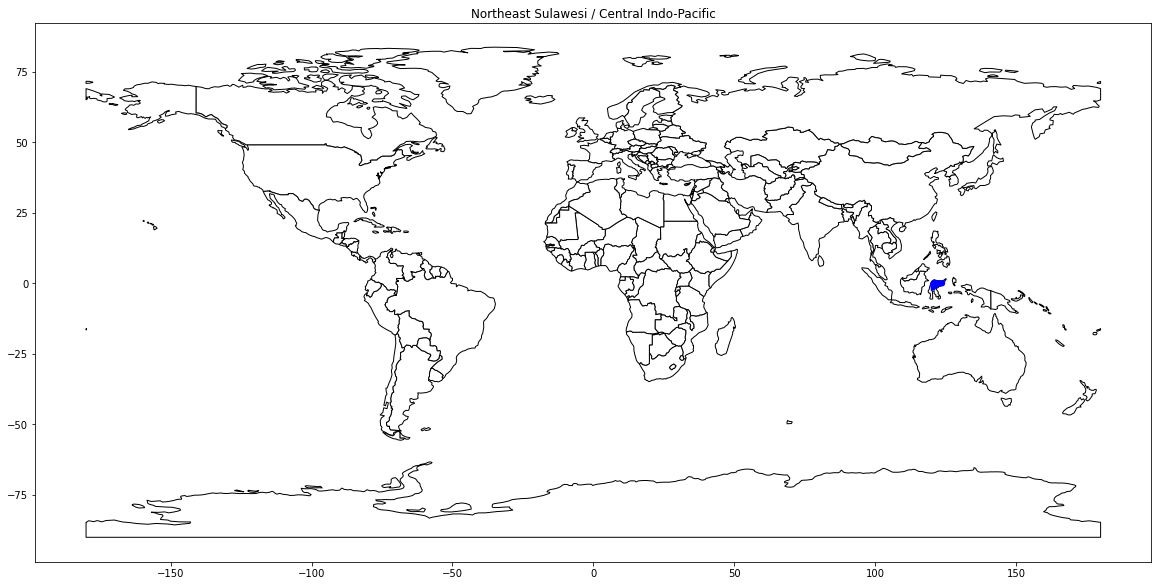

In [11]:
fig = marinvaders.plot(eco_code=selected_eco_code)

Now, we can use marinvaders to get an overview about the marine life in this 
region. **Note** that the following command can take quite some time, as it 
gathers data from remote and local sources for all species present in the selected eco-region.

In [12]:
eco_region_data = marinvaders.MarineLife(eco_code=selected_eco_code)

Lets check the species reported to occur in this region.

In [13]:
eco_region_data.all_species

aphiaID                    species           ECOREGION  ECO_CODE  \
0     111656            Amathia distans  Northeast Sulawesi     20133   
1     130969       Sabella spallanzanii  Northeast Sulawesi     20133   
2     141607             Teredo navalis  Northeast Sulawesi     20133   
3     395084            Varanus indicus  Northeast Sulawesi     20133   
4     395098             Carijoa riisei  Northeast Sulawesi     20133   
..       ...                        ...                 ...       ...   
749   282718  Scolecenchelys macroptera                 NaN     20133   
756   408975        Chorisquilla mehtae                 NaN     20133   
760  1310476    Sternostylus hendersoni                 NaN     20133   
761   125223              Deima validum                 NaN     20133   
762   217065              Pollia undosa                 NaN     20133   

    establishmentMeans dataset  \
0                Alien  NatCon   
1                Alien  NatCon   
2                Alien  NatCon   
3                Alien  NatCon   
4                Alien  NatCon   
..                 ...     ...   
749                NaN     NaN   
756                NaN     NaN   
760                NaN     NaN   
761                NaN     NaN   
762                NaN     NaN   

                                              geometry  
0    POLYGON ((122.6698212273602 0.7313694750158106...  
1    POLYGON ((122.6698212273602 0.7313694750158106...  
2    POLYGON ((122.6698212273602 0.7313694750158106...  
3    POLYGON ((122.6698212273602 0.7313694750158106...  
4    POLYGON ((122.6698212273602 0.7313694750158106...  
..                                                 ...  
749                                                NaN  
756                                                NaN  
760                                                NaN  
761                                                NaN  
762                                                NaN  

[315 rows x 7 columns]

We can then also extract all species reported as alien in this region:

In [14]:
eco_region_data.alien_species

ECO_CODE_X  aphiaID establishmentMeans               species  ECO_CODE  \
0         133   111656              Alien       Amathia distans     20133   
1         133   130969              Alien  Sabella spallanzanii     20133   
2         133   141607              Alien        Teredo navalis     20133   
3         133   395084              Alien       Varanus indicus     20133   
4         133   395098              Alien        Carijoa riisei     20133   

  dataset           ECOREGION  MRGID  decimalLatitude  decimalLongitude  \
0  NatCon  Northeast Sulawesi   8492              NaN               NaN   
1  NatCon  Northeast Sulawesi   8492              NaN               NaN   
2  NatCon  Northeast Sulawesi   8492              NaN               NaN   
3  NatCon  Northeast Sulawesi   8492              NaN               NaN   
4  NatCon  Northeast Sulawesi   8492              NaN               NaN   

                                            geometry  index  
0  POLYGON ((122.6698212273602 0.7313694750158106...    NaN  
1  POLYGON ((122.6698212273602 0.7313694750158106...    NaN  
2  POLYGON ((122.6698212273602 0.7313694750158106...    NaN  
3  POLYGON ((122.6698212273602 0.7313694750158106...    NaN  
4  POLYGON ((122.6698212273602 0.7313694750158106...    NaN

In [15]:
print(f"Found {len(eco_region_data.alien_species)} alien species in that region: {', '.join(eco_region_data.alien_species.species)}")

Found 5 alien species in that region: Amathia distans, Sabella spallanzanii, Teredo navalis, Varanus indicus, Carijoa riisei


## Conclusion and additional data

With Marinvaders it is possible to assess the alien status of certain species and to assess alien species within an eco-region. Marinvaders also integrates with data from IUCN: [GISD](https://www.iucngisd.org/gisd/) and [Red list](https://www.iucnredlist.org/) which provides additional information on the distribution of aliens species (GISD) and which native species are affeced by alien invaders (redlist).
Due to licencing issues these data can not be included automatically but needs to be downloaded manually. See the section [Optional IUCN data](https://marinvaders.gitlab.io/marinvaders/iucn_data/) for further details.

## About

Marinvaders was developed and maintained by the [Industrial Ecology Digital 
Lab](https://iedl.no "IEDL") and LC-Impact group led by [Francesca
Verones](https://www.ntnu.edu/employees/francesca.verones), both at the [Industrial Ecology Programme](https://www.ntnu.edu/indecol/industrial-ecology-programme) at [NTNU](https://www.ntnu.edu/).  

Marinvaders is part of the [ATLANTIS ERC project.](https://atlantis-erc.eu/)

